# Simple_Linear_Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [2]:
delivery_time = pd.read_csv("delivery_time.csv")
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and data understanding

In [3]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
delivery_time.shape

(21, 2)

In [5]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
delivery_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Data visualisation

<AxesSubplot:ylabel='Density'>

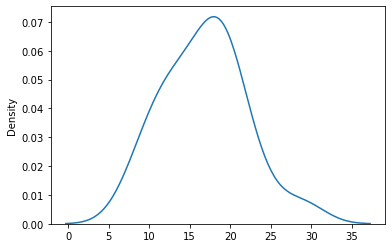

In [8]:
sns.distplot(x=delivery_time['Delivery Time'],hist=False)

In [9]:
delivery_time['Delivery Time'].skew()

0.3523900822831107

In [10]:
delivery_time['Delivery Time'].kurtosis()

0.31795982942685397

Normality test passed.

<AxesSubplot:ylabel='Density'>

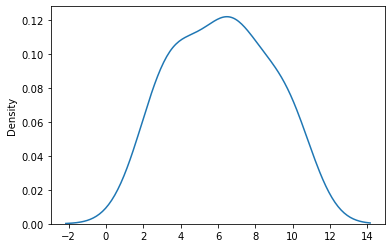

In [11]:
sns.distplot(x=delivery_time['Sorting Time'],hist=False)

<function matplotlib.pyplot.show(close=None, block=None)>

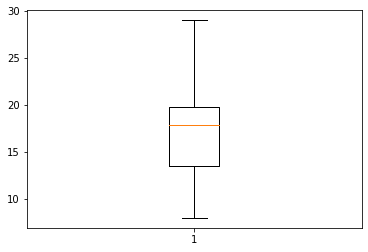

In [12]:
plt.boxplot(delivery_time['Delivery Time'])
plt.show

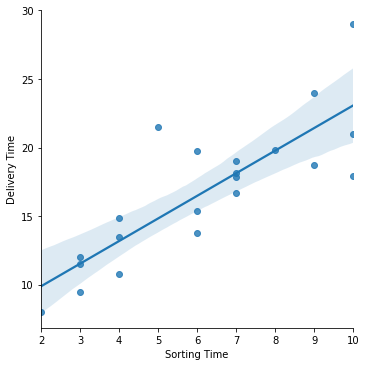

In [13]:
sns.lmplot('Sorting Time','Delivery Time',data=delivery_time)

Linearity test failed since most of the data points fall away from the line.

In [14]:
delivery_time = delivery_time.rename(columns={'Delivery Time':'deliverytime','Sorting Time':'sortingtime'})
delivery_time.head(10)

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# model building and training

In [15]:
model=smf.ols('deliverytime~sortingtime',data=delivery_time).fit()

In [16]:
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [17]:
y_pred=model.predict()
y_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

### model training and testing

In [18]:
error=delivery_time['deliverytime']-y_pred   # error calculation
error

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
Name: deliverytime, dtype: float64

In [19]:
mean_absolute_error(delivery_time['deliverytime'],y_pred)

2.085740955188266

In [20]:
mean_absolute_percentage_error(delivery_time['deliverytime'],y_pred)

0.12379726239852047

In [21]:
mean_squared_error(delivery_time['deliverytime'],y_pred)

7.793311548584062

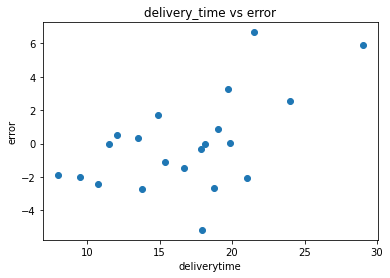

In [22]:
plt.scatter(delivery_time['deliverytime'],error)
plt.title('delivery_time vs error')
plt.xlabel('deliverytime')
plt.ylabel('error')
plt.show()

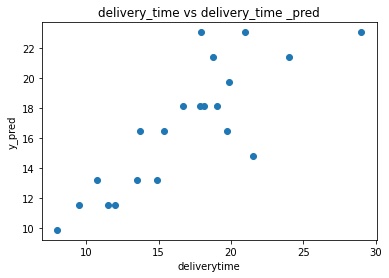

In [23]:
plt.scatter(delivery_time['deliverytime'],y_pred)
plt.title('delivery_time vs delivery_time _pred')
plt.xlabel('deliverytime')
plt.ylabel('y_pred')
plt.show()

In [24]:
print('R-square      :',round(model.rsquared,4))
print('R-squared_adj :',round(model.rsquared_adj,4))
print('AIC           :',model.aic)
print('BIC           :',model.bic)

R-square      : 0.6823
R-squared_adj : 0.6655
AIC           : 106.71400170798609
BIC           : 108.80304658343293


# using log transformation method

In [25]:
x=np.log(delivery_time['sortingtime'])
x_data=pd.DataFrame(x,)
x_data.rename(columns={'sortingtime':'log_sortingtime'},inplace=True)

In [26]:
y1=delivery_time['deliverytime']
y1

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: deliverytime, dtype: float64

In [27]:
x_data['deliverytime']=y1
x_data

,log_sortingtime,deliverytime
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00
5,1.791759,15.35
6,1.945910,19.00
7,1.098612,9.50
8,2.302585,17.90
9,2.197225,18.75


# model building and training

In [28]:
model_1=smf.ols('deliverytime~log_sortingtime',data=x_data).fit()

In [29]:
model_1.params

Intercept          1.159684
log_sortingtime    9.043413
dtype: float64

In [30]:
y_pred_1=model_1.predict()

error calculation

In [31]:
error_1=x_data['deliverytime']-y_pred_1
error_1

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
Name: deliverytime, dtype: float64

In [32]:
mean_absolute_error(x_data['deliverytime'],y_pred_1)

2.0473757067928986

In [33]:
mean_absolute_percentage_error(x_data['deliverytime'],y_pred_1)

0.11897591033993342

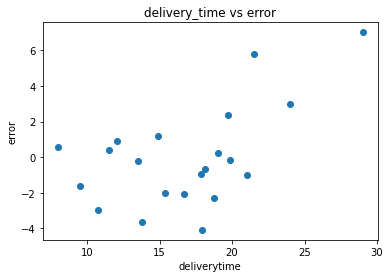

In [34]:
plt.scatter(x_data['deliverytime'],y=error_1)
plt.title('delivery_time vs error')
plt.xlabel('deliverytime')
plt.ylabel('error')
plt.show()

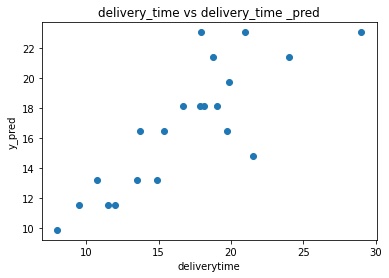

In [35]:
plt.scatter(x_data['deliverytime'],y_pred)
plt.title('delivery_time vs delivery_time _pred')
plt.xlabel('deliverytime')
plt.ylabel('y_pred')
plt.show()

In [36]:
print('R-square      :',round(model_1.rsquared,4))
print('R-squared_adj :',round(model_1.rsquared_adj,4))
print('AIC           :',model_1.aic)
print('BIC           :',model_1.bic)

R-square      : 0.6954
R-squared_adj : 0.6794
AIC           : 105.82484961062757
BIC           : 107.91389448607441


# using log10 transformation method

In [37]:
x=np.log10(delivery_time['sortingtime'])
delivery_time['log10_sortingtime']=pd.DataFrame(x)
delivery_time

,deliverytime,sortingtime,log10_sortingtime
0,21.00,10,1.000000
1,13.50,4,0.602060
2,19.75,6,0.778151
3,24.00,9,0.954243
4,29.00,10,1.000000
5,15.35,6,0.778151
6,19.00,7,0.845098
7,9.50,3,0.477121
8,17.90,10,1.000000
9,18.75,9,0.954243


model building and training

In [38]:
model_2=smf.ols('deliverytime~log10_sortingtime',data=delivery_time).fit()

In [39]:
model_2.params

Intercept             1.159684
log10_sortingtime    20.823229
dtype: float64

In [40]:
y_pred_2=model_2.predict()
y_pred_2

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

In [41]:
error_2=delivery_time['deliverytime']-y_pred_2
error_2

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
Name: deliverytime, dtype: float64

In [42]:
mean_absolute_error(delivery_time['deliverytime'],y_pred_2)

2.047375706792901

In [43]:
mean_absolute_percentage_error(delivery_time['deliverytime'],y_pred_2)

0.1189759103399336

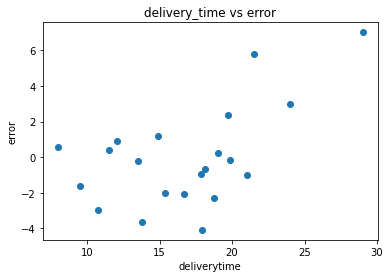

In [44]:
plt.scatter(x_data['deliverytime'],error_2)
plt.title('delivery_time vs error')
plt.xlabel('deliverytime')
plt.ylabel('error')
plt.show()

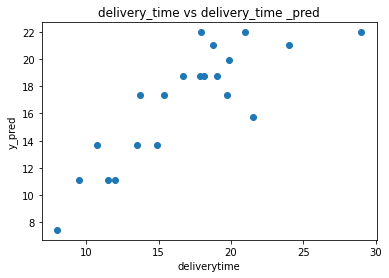

In [45]:
plt.scatter(x_data['deliverytime'],y_pred_2)
plt.title('delivery_time vs delivery_time _pred')
plt.xlabel('deliverytime')
plt.ylabel('y_pred')
plt.show()

In [46]:
print('R-square      :',round(model_2.rsquared,4))
print('R-squared_adj :',round(model_2.rsquared_adj,4))
print('AIC           :',model_2.aic)
print('BIC           :',model_2.bic)

R-square      : 0.6954
R-squared_adj : 0.6794
AIC           : 105.82484961062757
BIC           : 107.91389448607441


# using sqrt transforamtion method

In [47]:
x_sqrt=np.sqrt(delivery_time['sortingtime'])
delivery_time['sqrt_sortingtime']=pd.DataFrame(x_sqrt)
delivery_time

,deliverytime,sortingtime,log10_sortingtime,sqrt_sortingtime
0,21.00,10,1.000000,3.162278
1,13.50,4,0.602060,2.000000
2,19.75,6,0.778151,2.449490
3,24.00,9,0.954243,3.000000
4,29.00,10,1.000000,3.162278
5,15.35,6,0.778151,2.449490
6,19.00,7,0.845098,2.645751
7,9.50,3,0.477121,1.732051
8,17.90,10,1.000000,3.162278
9,18.75,9,0.954243,3.000000


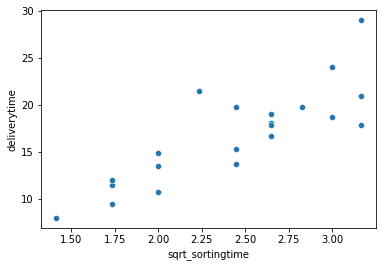

In [48]:
sns.scatterplot('sqrt_sortingtime','deliverytime',data=delivery_time)
plt.show()

# model building and trianing

In [49]:
model_3=smf.ols('deliverytime~sqrt_sortingtime',data=delivery_time).fit()

In [50]:
model_3.params

Intercept          -2.518837
sqrt_sortingtime    7.936591
dtype: float64

In [51]:
y_pred_3=model_3.predict()
y_pred_3

array([22.57886702, 13.35434489, 16.92176102, 21.29093564, 22.57886702,
       16.92176102, 18.47940877, 11.22774181, 22.57886702, 21.29093564,
       19.92923195, 13.35434489, 18.47940877, 11.22774181, 11.22774181,
       13.35434489, 16.92176102, 18.47940877,  8.70519766, 18.47940877,
       15.22791982])

In [52]:
error_3=delivery_time['deliverytime']-y_pred_3
error_3

0    -1.578867
1     0.145655
2     2.828239
3     2.709064
4     6.421133
5    -1.571761
6     0.520591
7    -1.727742
8    -4.678867
9    -2.540936
10   -0.099232
11   -2.604345
12   -1.799409
13    0.272258
14    0.802258
15    1.525655
16   -3.171761
17   -0.369409
18   -0.705198
19   -0.649409
20    6.272080
Name: deliverytime, dtype: float64

In [53]:
mean_absolute_error(delivery_time['deliverytime'],y_pred_3)

2.0473270802803576

In [54]:
mean_absolute_percentage_error(delivery_time['deliverytime'],y_pred_3)

0.11844989166789982

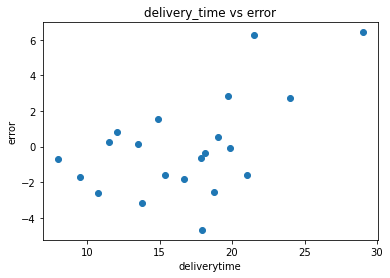

In [55]:
plt.scatter(x_data['deliverytime'],y=error_3)
plt.title('delivery_time vs error')
plt.xlabel('deliverytime')
plt.ylabel('error')
plt.show()

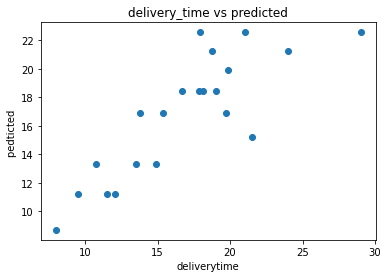

In [56]:
plt.scatter(x_data['deliverytime'],y_pred_3)
plt.title('delivery_time vs predicted')
plt.xlabel('deliverytime')
plt.ylabel('pedticted ')
plt.show()

In [57]:
print('R-square      :',round(model_3.rsquared,4))
print('R-squared_adj :',round(model_3.rsquared_adj,4))
print('AIC           :',model_3.aic)
print('BIC           :',model_3.bic)

R-square      : 0.6958
R-squared_adj : 0.6798
AIC           : 105.79982096676981
BIC           : 107.88886584221666


#Inference - among these transformations 'log tranforamtion' is the best.